# Homework 6 Code - Dario Placencio

### 1 Implementation: GAN (50 pts)

(a) Implement training loop and report learning curves and generated images in epoch 1, 50, 100. Note that drawing learning curves and visualization of images are already implemented in provided jupyter notebook. (20 pts)

#### GAN with MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cuda = torch.device('cuda:0')

##### Define learning parameters

In [5]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator

##### Prepare training dataset

In [6]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


##### Generator

In [7]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

##### Discriminator

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [9]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

##### Tools for training

In [10]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [11]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [12]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [13]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [14]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [15]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [16]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

##### Training

In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

118it [00:10, 10.80it/s]                         


Epoch 1 of 100
Generator loss: 2.11920312, Discriminator loss: 0.76175348


118it [00:11, 10.26it/s]                         


Epoch 2 of 100
Generator loss: 3.21311511, Discriminator loss: 0.68023711


118it [00:11, 10.23it/s]                         


Epoch 3 of 100
Generator loss: 2.95189136, Discriminator loss: 0.69517191


118it [00:10, 11.05it/s]                         


Epoch 4 of 100
Generator loss: 2.54177409, Discriminator loss: 0.69475299


118it [00:11, 10.49it/s]                         


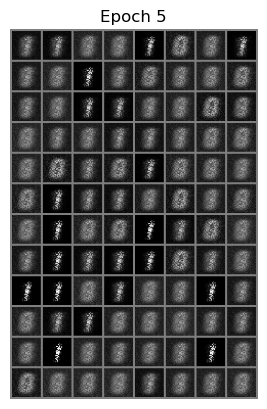

Epoch 5 of 100
Generator loss: 2.27097447, Discriminator loss: 0.71742772


118it [00:10, 11.43it/s]                         


Epoch 6 of 100
Generator loss: 2.75280840, Discriminator loss: 0.57146289


118it [00:10, 11.33it/s]                         


Epoch 7 of 100
Generator loss: 3.06480193, Discriminator loss: 0.46801300


118it [00:10, 11.02it/s]                         


Epoch 8 of 100
Generator loss: 3.26180160, Discriminator loss: 0.42246117


118it [00:10, 11.02it/s]                         


Epoch 9 of 100
Generator loss: 3.05630102, Discriminator loss: 0.54294724


118it [00:11, 10.52it/s]                         


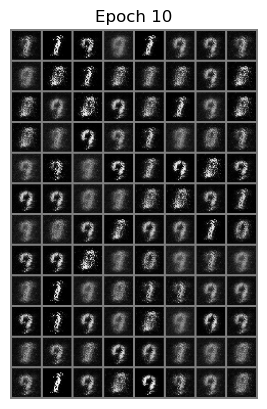

Epoch 10 of 100
Generator loss: 2.75276928, Discriminator loss: 0.54486553


118it [00:11, 10.23it/s]                         


Epoch 11 of 100
Generator loss: 3.22777524, Discriminator loss: 0.43289162


118it [00:10, 11.45it/s]                         


Epoch 12 of 100
Generator loss: 3.57777804, Discriminator loss: 0.33871872


118it [00:11, 10.12it/s]                         


Epoch 13 of 100
Generator loss: 3.07937461, Discriminator loss: 0.55549750


118it [00:11, 10.32it/s]                         


Epoch 14 of 100
Generator loss: 2.92042014, Discriminator loss: 0.46723962


118it [00:11, 10.36it/s]                         


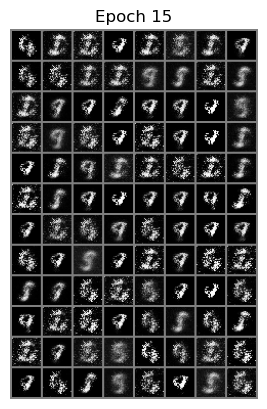

Epoch 15 of 100
Generator loss: 3.27344872, Discriminator loss: 0.50781973


118it [00:10, 10.75it/s]                         


Epoch 16 of 100
Generator loss: 3.31075247, Discriminator loss: 0.46232648


118it [00:11, 10.35it/s]                         


Epoch 17 of 100
Generator loss: 3.04257185, Discriminator loss: 0.49054923


118it [00:11, 10.47it/s]                         


Epoch 18 of 100
Generator loss: 3.05414569, Discriminator loss: 0.51454945


118it [00:11, 10.43it/s]                         


Epoch 19 of 100
Generator loss: 3.09515906, Discriminator loss: 0.52451166


118it [00:11, 10.48it/s]                         


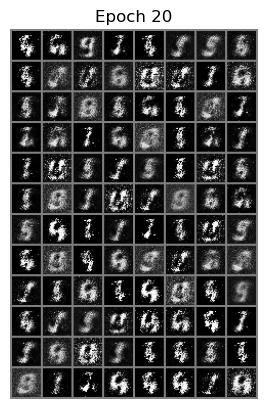

Epoch 20 of 100
Generator loss: 3.20749507, Discriminator loss: 0.43700792


118it [00:11, 10.39it/s]                         


Epoch 21 of 100
Generator loss: 2.91039770, Discriminator loss: 0.53961365


118it [00:11, 10.34it/s]                         


Epoch 22 of 100
Generator loss: 2.73128060, Discriminator loss: 0.62521036


118it [00:11, 10.40it/s]                         


Epoch 23 of 100
Generator loss: 2.93951546, Discriminator loss: 0.50523581


118it [00:11, 10.63it/s]                         


Epoch 24 of 100
Generator loss: 2.92316677, Discriminator loss: 0.53870958


118it [00:11, 10.51it/s]                         


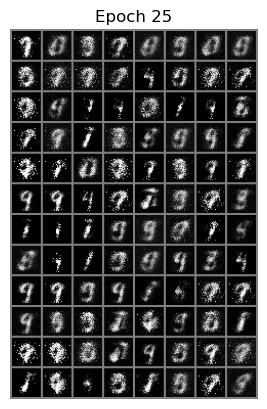

Epoch 25 of 100
Generator loss: 2.68110164, Discriminator loss: 0.53615601


118it [00:11, 10.34it/s]                         


Epoch 26 of 100
Generator loss: 2.79722890, Discriminator loss: 0.53076959


118it [00:11, 10.46it/s]                         


Epoch 27 of 100
Generator loss: 3.07031957, Discriminator loss: 0.50984717


118it [00:11, 10.43it/s]                         


Epoch 28 of 100
Generator loss: 3.21750080, Discriminator loss: 0.49664728


118it [00:11, 10.49it/s]                         


Epoch 29 of 100
Generator loss: 2.99708329, Discriminator loss: 0.49274200


118it [00:11, 10.40it/s]                         


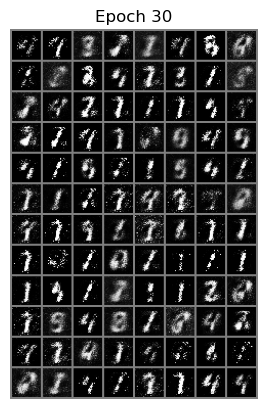

Epoch 30 of 100
Generator loss: 2.98494474, Discriminator loss: 0.47964011


118it [00:11, 10.59it/s]                         


Epoch 31 of 100
Generator loss: 3.23128761, Discriminator loss: 0.45971737


118it [00:11, 10.53it/s]                         


Epoch 32 of 100
Generator loss: 3.38404307, Discriminator loss: 0.44397582


118it [00:11, 10.40it/s]                         


Epoch 33 of 100
Generator loss: 3.07881816, Discriminator loss: 0.53463274


118it [00:11, 10.45it/s]                         


Epoch 34 of 100
Generator loss: 2.92117816, Discriminator loss: 0.55691275


118it [00:11, 10.42it/s]                         


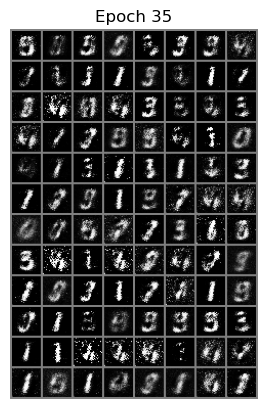

Epoch 35 of 100
Generator loss: 2.75155906, Discriminator loss: 0.59091291


118it [00:11, 10.41it/s]                         


Epoch 36 of 100
Generator loss: 2.71843488, Discriminator loss: 0.59719722


118it [00:11, 10.21it/s]                         


Epoch 37 of 100
Generator loss: 2.90479791, Discriminator loss: 0.50090379


118it [00:11,  9.87it/s]                         


Epoch 38 of 100
Generator loss: 3.26263227, Discriminator loss: 0.43669416


118it [00:13,  8.98it/s]                         


Epoch 39 of 100
Generator loss: 3.00021644, Discriminator loss: 0.50823452


118it [00:12,  9.63it/s]                         


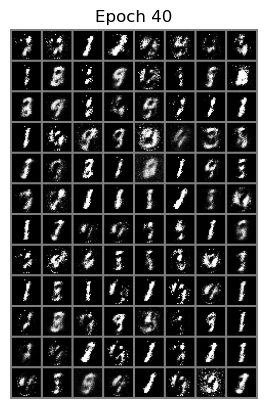

Epoch 40 of 100
Generator loss: 3.00558045, Discriminator loss: 0.45188760


118it [00:12,  9.28it/s]                         


Epoch 41 of 100
Generator loss: 2.91593509, Discriminator loss: 0.52138718


118it [00:12,  9.54it/s]                         


Epoch 42 of 100
Generator loss: 2.91813613, Discriminator loss: 0.53535047


118it [00:11, 10.42it/s]                         


Epoch 43 of 100
Generator loss: 2.71459049, Discriminator loss: 0.59110110


118it [00:11, 10.42it/s]                         


Epoch 44 of 100
Generator loss: 2.75338401, Discriminator loss: 0.55380646


118it [00:11, 10.38it/s]                         


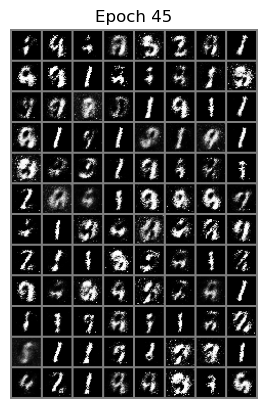

Epoch 45 of 100
Generator loss: 2.61323404, Discriminator loss: 0.61400284


118it [00:11, 10.34it/s]                         


Epoch 46 of 100
Generator loss: 2.94025077, Discriminator loss: 0.53000369


118it [00:11, 10.16it/s]                         


Epoch 47 of 100
Generator loss: 2.95687786, Discriminator loss: 0.49822816


118it [00:11, 10.42it/s]                         


Epoch 48 of 100
Generator loss: 2.89008028, Discriminator loss: 0.51924909


118it [00:11, 10.40it/s]                         


Epoch 49 of 100
Generator loss: 2.64341292, Discriminator loss: 0.56877257


118it [00:11, 10.41it/s]                         


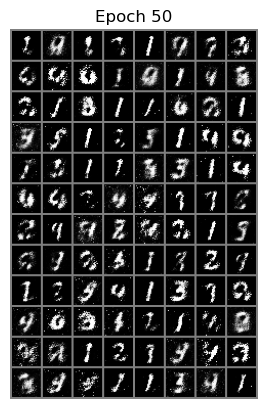

Epoch 50 of 100
Generator loss: 2.90005110, Discriminator loss: 0.52410749


118it [00:11, 10.55it/s]                         


Epoch 51 of 100
Generator loss: 2.94499286, Discriminator loss: 0.52117370


118it [00:11, 10.41it/s]                         


Epoch 52 of 100
Generator loss: 2.81867855, Discriminator loss: 0.54157372


118it [00:11, 10.37it/s]                         


Epoch 53 of 100
Generator loss: 2.82749847, Discriminator loss: 0.53271506


118it [00:11, 10.31it/s]                         


Epoch 54 of 100
Generator loss: 2.81412575, Discriminator loss: 0.57497114


118it [00:11, 10.55it/s]                         


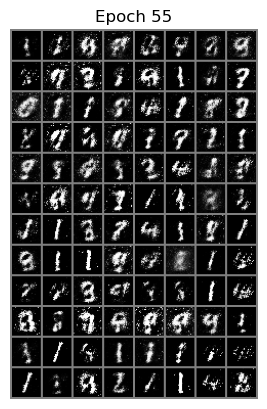

Epoch 55 of 100
Generator loss: 2.60234060, Discriminator loss: 0.64410903


118it [00:11, 10.52it/s]                         


Epoch 56 of 100
Generator loss: 2.48796903, Discriminator loss: 0.63789281


118it [00:11, 10.47it/s]                         


Epoch 57 of 100
Generator loss: 2.68083444, Discriminator loss: 0.59873883


118it [00:11, 10.46it/s]                         


Epoch 58 of 100
Generator loss: 2.70407416, Discriminator loss: 0.62984388


118it [00:11, 10.55it/s]                         


Epoch 59 of 100
Generator loss: 2.37358414, Discriminator loss: 0.64348563


118it [00:11, 10.38it/s]                         


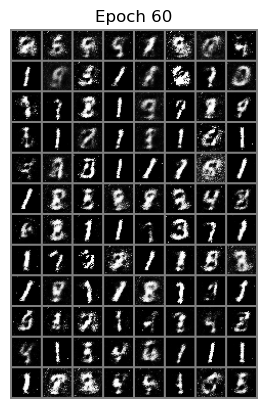

Epoch 60 of 100
Generator loss: 2.42219235, Discriminator loss: 0.63363120


118it [00:11, 10.52it/s]                         


Epoch 61 of 100
Generator loss: 2.38527671, Discriminator loss: 0.64533412


118it [00:11, 10.51it/s]                         


Epoch 62 of 100
Generator loss: 2.30106022, Discriminator loss: 0.65407417


118it [00:11, 10.44it/s]                         


Epoch 63 of 100
Generator loss: 2.26172813, Discriminator loss: 0.65768740


118it [00:11, 10.37it/s]                         


Epoch 64 of 100
Generator loss: 2.33022655, Discriminator loss: 0.66721014


118it [00:11, 10.40it/s]                         


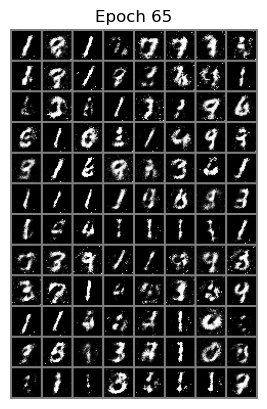

Epoch 65 of 100
Generator loss: 2.38609268, Discriminator loss: 0.65403916


118it [00:11, 10.29it/s]                         


Epoch 66 of 100
Generator loss: 2.38419897, Discriminator loss: 0.67955212


118it [00:15,  7.74it/s]                         


Epoch 67 of 100
Generator loss: 2.36018814, Discriminator loss: 0.67975336


118it [00:16,  7.27it/s]                         


Epoch 68 of 100
Generator loss: 2.27891266, Discriminator loss: 0.69581752


118it [00:16,  7.25it/s]                         


Epoch 69 of 100
Generator loss: 2.24722468, Discriminator loss: 0.70422427


118it [00:15,  7.38it/s]                         


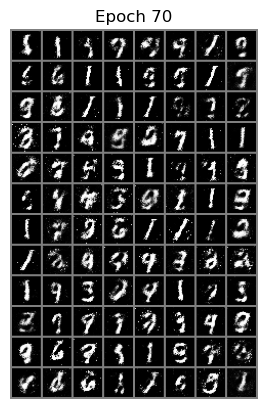

Epoch 70 of 100
Generator loss: 2.28568192, Discriminator loss: 0.69194227


118it [00:16,  7.33it/s]                         


Epoch 71 of 100
Generator loss: 2.18383856, Discriminator loss: 0.73709232


118it [00:16,  7.31it/s]                         


Epoch 72 of 100
Generator loss: 2.20531883, Discriminator loss: 0.70591446


118it [00:16,  7.27it/s]                         


Epoch 73 of 100
Generator loss: 2.27988646, Discriminator loss: 0.68599890


118it [00:16,  7.31it/s]                         


Epoch 74 of 100
Generator loss: 2.11627066, Discriminator loss: 0.75638483


118it [00:16,  7.21it/s]                         


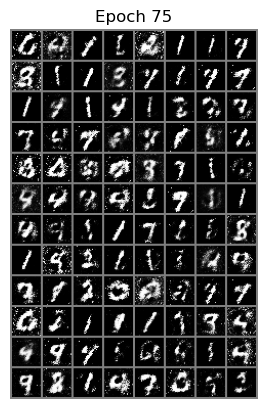

Epoch 75 of 100
Generator loss: 2.19731324, Discriminator loss: 0.76437094


118it [00:16,  7.25it/s]                         


Epoch 76 of 100
Generator loss: 2.07974773, Discriminator loss: 0.73481486


118it [00:16,  7.29it/s]                         


Epoch 77 of 100
Generator loss: 2.19386074, Discriminator loss: 0.71692069


118it [00:16,  7.31it/s]                         


Epoch 78 of 100
Generator loss: 2.28258605, Discriminator loss: 0.73398689


118it [00:16,  7.29it/s]                         


Epoch 79 of 100
Generator loss: 2.12288798, Discriminator loss: 0.74881934


118it [00:16,  7.31it/s]                         


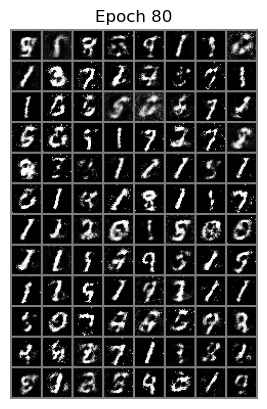

Epoch 80 of 100
Generator loss: 2.05762058, Discriminator loss: 0.77273857


118it [00:16,  7.29it/s]                         


Epoch 81 of 100
Generator loss: 2.05994537, Discriminator loss: 0.77390735


118it [00:16,  7.19it/s]                         


Epoch 82 of 100
Generator loss: 2.03028783, Discriminator loss: 0.76419510


118it [00:14,  8.00it/s]                         


Epoch 83 of 100
Generator loss: 2.10656560, Discriminator loss: 0.77684178


118it [00:16,  7.31it/s]                         


Epoch 84 of 100
Generator loss: 1.93958448, Discriminator loss: 0.82741154


118it [00:15,  7.58it/s]                         


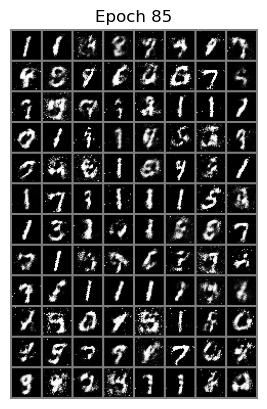

Epoch 85 of 100
Generator loss: 2.00311625, Discriminator loss: 0.76947991


118it [00:15,  7.57it/s]                         


Epoch 86 of 100
Generator loss: 1.98221236, Discriminator loss: 0.79985900


118it [00:16,  7.36it/s]                         


Epoch 87 of 100
Generator loss: 1.96561313, Discriminator loss: 0.82520339


118it [00:16,  7.30it/s]                         


Epoch 88 of 100
Generator loss: 1.91398233, Discriminator loss: 0.82792936


118it [00:16,  7.31it/s]                         


Epoch 89 of 100
Generator loss: 1.87654772, Discriminator loss: 0.81883733


118it [00:15,  7.66it/s]                         


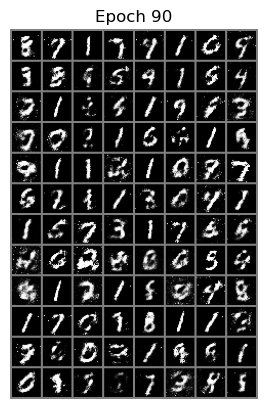

Epoch 90 of 100
Generator loss: 1.91670683, Discriminator loss: 0.81091079


118it [00:15,  7.38it/s]                         


Epoch 91 of 100
Generator loss: 1.88597834, Discriminator loss: 0.81821916


118it [00:16,  7.35it/s]                         


Epoch 92 of 100
Generator loss: 1.93071054, Discriminator loss: 0.79274275


118it [00:16,  7.31it/s]                         


Epoch 93 of 100
Generator loss: 1.94747567, Discriminator loss: 0.78900805


118it [00:16,  7.35it/s]                         


Epoch 94 of 100
Generator loss: 2.02564264, Discriminator loss: 0.79175943


118it [00:16,  7.31it/s]                         


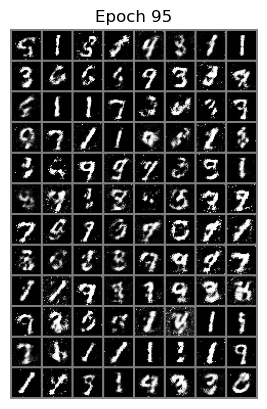

Epoch 95 of 100
Generator loss: 1.82756723, Discriminator loss: 0.86072743


118it [00:16,  7.28it/s]                         


Epoch 96 of 100
Generator loss: 1.77361203, Discriminator loss: 0.86495884


118it [00:16,  7.21it/s]                         


Epoch 97 of 100
Generator loss: 1.77361679, Discriminator loss: 0.87259392


118it [00:16,  7.29it/s]                         


Epoch 98 of 100
Generator loss: 1.72909993, Discriminator loss: 0.86238978


118it [00:16,  7.29it/s]                         


Epoch 99 of 100
Generator loss: 1.82591767, Discriminator loss: 0.84247675


118it [00:16,  7.30it/s]                         


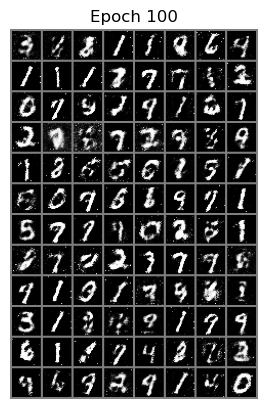

Epoch 100 of 100
Generator loss: 1.81826685, Discriminator loss: 0.84675722


In [19]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    return criterion(output, true_label)

def discriminator_loss(output, true_label):
    return criterion(output, true_label)

# Normalize the images to [0, 1] range before visualization
def normalize(image):
    return (image - image.min()) / (image.max() - image.min())

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = image.size(0)

        # Train Discriminator
        optim_d.zero_grad()
        # Real Images
        real_label = label_real(b_size)
        output_real = discriminator(image)
        d_loss_real = discriminator_loss(output_real, real_label)

        # Fake Images
        noise = create_noise(b_size, nz)
        fake_images = generator(noise)
        fake_label = label_fake(b_size)
        output_fake = discriminator(fake_images.detach())
        d_loss_fake = discriminator_loss(output_fake, fake_label)

        # Total Discriminator Loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        output_fake = discriminator(fake_images)
        g_loss = generator_loss(output_fake, real_label)
        g_loss.backward()
        optim_g.step()

        loss_g += g_loss.item()
        loss_d += d_loss.item()

    # Create and visualize generated images every 5 epochs
    if (epoch + 1) % 5 == 0:
        generated_img = generator(noise).cpu().detach()
        generated_img = make_grid(generated_img)
        normalized_img = normalize(generated_img)  # Normalize the image
        plt.imshow(normalized_img.permute(1, 2, 0))
        plt.title(f'Epoch {epoch+1}')
        plt.axis('off')
        plt.show()

        # Save the generated torch tensor models to disk
        save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        images.append(generated_img)

    epoch_loss_g = loss_g / bi # Total generator loss for the epoch
    epoch_loss_d = loss_d / bi # Total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [20]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [21]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

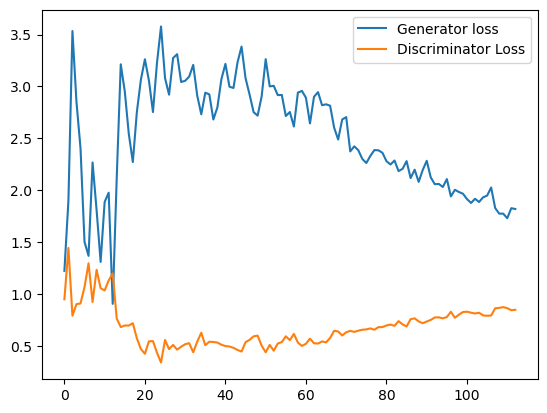

In [22]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')

(b) Replace the generator update rule as the original one in the slide, “Update the generator by descending its stochastic gradient”, and report learning curves and generated images in epoch 1, 50, 100. Compare the result with (a)

####  Variation of GAN - SGD

In [45]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define learning parameters
batch_size = 512
epochs = 100
sample_size = 64  # fixed sample size for generator
nz = 128  # latent vector size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_data = datasets.MNIST(
    root='./input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),  # adding dropout
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),  # adding dropout
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),  # adding dropout
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

# Optimizers and loss function
optim_g = optim.SGD(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()

# Helper functions
def label_real(size):
    return torch.ones(size, 1, device=device)

def label_fake(size):
    return torch.zeros(size, 1, device=device)

def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

def save_generator_image(image, path):
    save_image(image, path)

def normalize(image):
    return (image - image.min()) / (image.max() - image.min())

noise = create_noise(sample_size, nz)

# Training Loop
torch.manual_seed(7777)

def generator_loss(disc_fake_pred):
    gen_loss = torch.mean(torch.log(1 - disc_fake_pred))
    return gen_loss

def discriminator_loss(real_pred, fake_pred):
    real_loss = criterion(real_pred, torch.ones_like(real_pred))
    fake_loss = criterion(fake_pred, torch.zeros_like(fake_pred))
    total_loss = (real_loss + fake_loss) / 2
    return total_loss

# Initialize lists to store the losses for plotting
g_losses = []
d_losses = []

# Store images from specified epochs
epoch_images = {}

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = image.size(0)

        # Train Discriminator
        optim_d.zero_grad()
        real_label = label_real(b_size)
        output_real = discriminator(image)
        noise = create_noise(b_size, nz)
        fake_images = generator(noise)
        output_fake = discriminator(fake_images.detach())
        d_loss = discriminator_loss(output_real, output_fake)
        d_loss.backward()
        optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        output_fake_for_gen = discriminator(fake_images)
        # Change generator loss to maximize log(D(G(z)))
        g_loss = criterion(output_fake_for_gen, label_real(b_size))
        g_loss.backward()
        optim_g.step()

        loss_g += g_loss.item()
        loss_d += d_loss.item()

    g_losses.append(loss_g / len(train_loader))
    d_losses.append(loss_d / len(train_loader))

    # Save images at specified epochs
    if epoch in [0, 49, 99]:  # Epochs are zero-indexed
        with torch.no_grad():
            generated_img = generator(noise).detach().cpu()
            generated_img = make_grid(generated_img, normalize=True)
            save_image(generated_img, f"./outputs/gen_img_epoch{epoch+1}.png")
            epoch_images

118it [00:10, 10.83it/s]                         
118it [00:09, 11.84it/s]                         
118it [00:10, 10.77it/s]                         
118it [00:10, 10.92it/s]                         
118it [00:11, 10.69it/s]                         
118it [00:11, 10.71it/s]                         
118it [00:11, 10.49it/s]                         
118it [00:11, 10.68it/s]                         
118it [00:10, 10.74it/s]                         
118it [00:11, 10.61it/s]                         
118it [00:11, 10.69it/s]                         
118it [00:11, 10.61it/s]                         
118it [00:11, 10.55it/s]                         
118it [00:10, 11.34it/s]                         
118it [00:11, 10.54it/s]                         
118it [00:10, 10.80it/s]                         
118it [00:11, 10.51it/s]                         
118it [00:10, 10.83it/s]                         
118it [00:11, 10.63it/s]                         
118it [00:11, 10.65it/s]                         


In [46]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_mod.pth')

DONE TRAINING


In [47]:
# Ring a sound when this cell finishes running
import os
os.system('say "Training complete"')

1

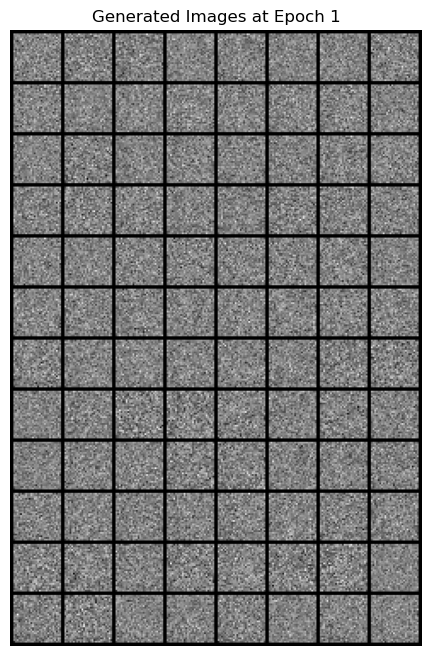

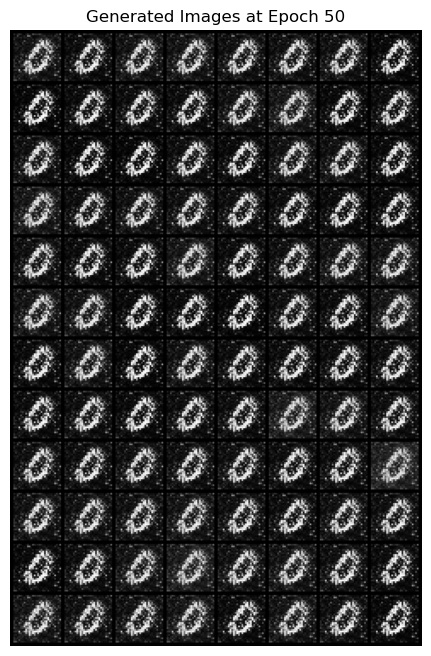

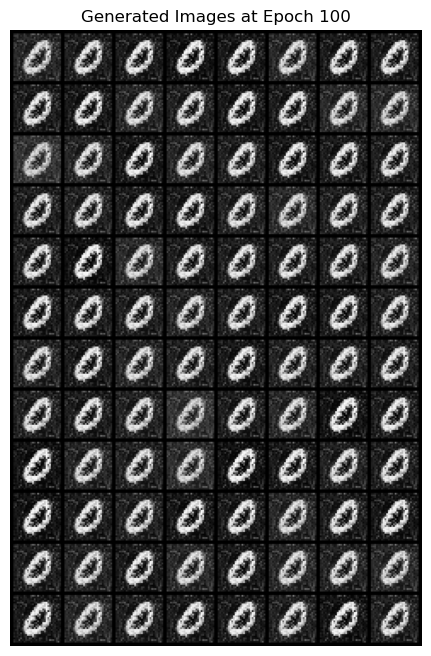

In [48]:
# Show the saved images for epoch 1, 50, and 100
for epoch in [1, 50, 100]:  # Corrected to match epoch numbers starting from 1
    image_file = f"./outputs/gen_img_epoch{epoch}.png"
    image = plt.imread(image_file)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title(f"Generated Images at Epoch {epoch}")
    plt.imshow(image)
    plt.show()

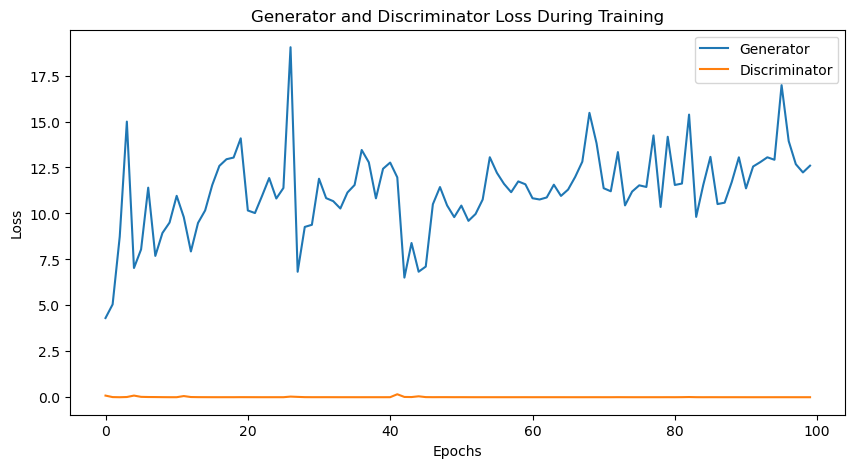

In [49]:
# Plot the training losses
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_losses, label="Generator")
plt.plot(d_losses, label="Discriminator")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

(c) Except the method that we used in (a), how can we improve training for GAN? Implement that and report your setup, learning curves, and generated images in epoch 1, 50, 100. This question is an open-ended question and you can choose whichever method you want.

#### GAN Improvements 

In [30]:
import torch
from torch import nn, autograd
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.utils import save_image, make_grid
import numpy as np
import torch.optim as optim
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Spectral Normalization code from PyTorch
def spectral_norm(module, name='weight', n_power_iterations=1, eps=1e-12, dim=None):
    if dim is None:
        if isinstance(module, (nn.ConvTranspose2d, nn.Conv2d)):
            dim = 1
        else:
            dim = 0
    setattr(module, name, nn.utils.spectral_norm(
        getattr(module, name), n_power_iterations=n_power_iterations, eps=eps, dim=dim))

# Improved Discriminator with Spectral Normalization
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.utils.spectral_norm(nn.Linear(self.n_input, 1024)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(1024, 512)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(512, 256)),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.utils.spectral_norm(nn.Linear(256, 1)),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

    
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)
    
# WGAN-GP Loss and Gradient Penalty
def gradient_penalty(discriminator, real_data, fake_data, device):
    batch_size = real_data.size(0)
    alpha = torch.rand(batch_size, 1, 1, 1).to(device)
    alpha = alpha.expand_as(real_data)
    
    interpolated = alpha * real_data.data + (1 - alpha) * fake_data.data
    interpolated = interpolated.requires_grad_(True)
    
    prob_interpolated = discriminator(interpolated)
    
    gradients = autograd.grad(outputs=prob_interpolated, inputs=interpolated,
                              grad_outputs=torch.ones(prob_interpolated.size()).to(device),
                              create_graph=True, retain_graph=True)[0]
    
    gradients = gradients.view(batch_size, -1)
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1) + 1e-12)
    
    return torch.mean((gradients_norm - 1) ** 2)

In [31]:
# Hyperparameters
lambda_gp = 10  # Gradient penalty lambda hyperparameter
n_critic = 5  # The number of critic iterations for one step of the generator
clip_value = 0.01  # Gradient clipping value
nz = 128  # nz is the length of the noise vector
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
k = 1 # number of steps to apply to the discriminator
lr_d = 0.0001  # learning rate for the discriminator
lr_g = 0.0002  # learning rate for the generator
discriminator_noise = 0.05  # Noise to add to discriminator inputs

# Now when you instantiate the Generator and Discriminator, make sure to pass `nz` to the Generator
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)

In [32]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


In [33]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
optim_d = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))

# Initialize learning rate scheduler
scheduler_g = torch.optim.lr_scheduler.StepLR(optim_g, step_size=1000, gamma=0.97)
scheduler_d = torch.optim.lr_scheduler.StepLR(optim_d, step_size=1000, gamma=0.97)

In [34]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [35]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [36]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)
    
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

In [37]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

118it [00:16,  7.20it/s]                         


Epoch 1 of 100
Generator loss: -8.26281330, Discriminator loss: -0.46020975


118it [00:16,  7.35it/s]                         


Epoch 2 of 100
Generator loss: -8.60957666, Discriminator loss: -0.46775316


118it [00:16,  7.09it/s]                         


Epoch 3 of 100
Generator loss: -8.54908839, Discriminator loss: -0.46157440


118it [00:16,  7.12it/s]                         


Epoch 4 of 100
Generator loss: -8.42119303, Discriminator loss: -0.48207996


118it [00:17,  6.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5 of 100
Generator loss: -7.82988271, Discriminator loss: -0.47474676


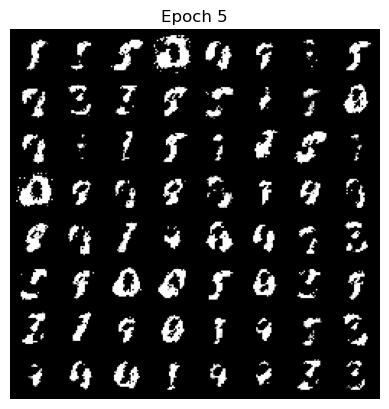

118it [00:17,  6.92it/s]                         


Epoch 6 of 100
Generator loss: -7.70589237, Discriminator loss: -0.46617452


118it [00:16,  7.27it/s]                         


Epoch 7 of 100
Generator loss: -7.50084890, Discriminator loss: -0.47096891


118it [00:16,  7.17it/s]                         


Epoch 8 of 100
Generator loss: -7.27040402, Discriminator loss: -0.47440099


118it [00:16,  7.33it/s]                         


Epoch 9 of 100
Generator loss: -7.27075040, Discriminator loss: -0.45965446


118it [00:16,  7.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 10 of 100
Generator loss: -7.28741025, Discriminator loss: -0.43874665


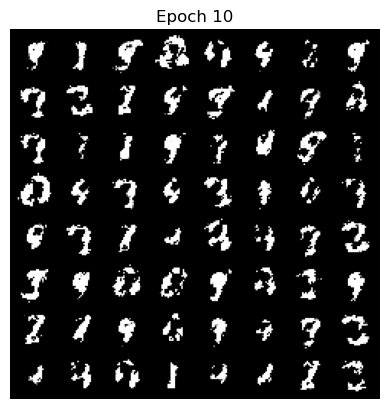

118it [00:16,  7.20it/s]                         


Epoch 11 of 100
Generator loss: -7.24062341, Discriminator loss: -0.44176207


118it [00:16,  6.98it/s]                         


Epoch 12 of 100
Generator loss: -6.90052673, Discriminator loss: -0.43836050


118it [00:16,  7.08it/s]                         


Epoch 13 of 100
Generator loss: -5.81146241, Discriminator loss: -0.48250087


118it [00:16,  7.12it/s]                         


Epoch 14 of 100
Generator loss: -6.69036094, Discriminator loss: -0.40179790


118it [00:16,  7.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 15 of 100
Generator loss: -6.72238638, Discriminator loss: -0.42448992


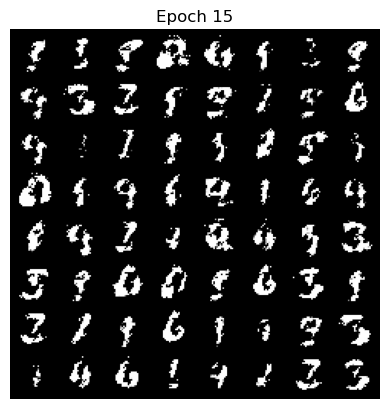

118it [00:16,  7.19it/s]                         


Epoch 16 of 100
Generator loss: -6.81801617, Discriminator loss: -0.39707628


118it [00:16,  7.25it/s]                         


Epoch 17 of 100
Generator loss: -7.11461268, Discriminator loss: -0.37501916


118it [00:16,  7.28it/s]                         


Epoch 18 of 100
Generator loss: -7.37525357, Discriminator loss: -0.37060754


118it [00:16,  7.20it/s]                         


Epoch 19 of 100
Generator loss: -7.29400768, Discriminator loss: -0.34897189


118it [00:16,  7.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20 of 100
Generator loss: -7.48718027, Discriminator loss: -0.33372157


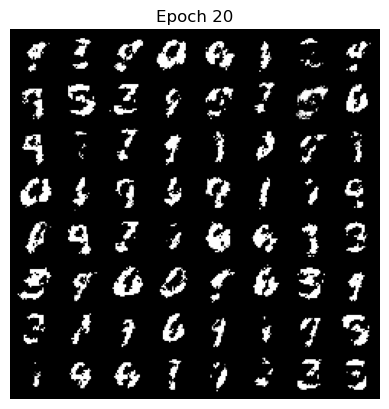

118it [00:16,  7.22it/s]                         


Epoch 21 of 100
Generator loss: -7.69956918, Discriminator loss: -0.34161041


118it [00:16,  7.06it/s]                         


Epoch 22 of 100
Generator loss: -7.56667823, Discriminator loss: -0.32493959


118it [00:17,  6.87it/s]                         


Epoch 23 of 100
Generator loss: -7.98774713, Discriminator loss: -0.31232294


118it [00:16,  6.97it/s]                         


Epoch 24 of 100
Generator loss: -8.23536252, Discriminator loss: -0.29638192


118it [00:16,  7.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 25 of 100
Generator loss: -8.43942758, Discriminator loss: -0.29380998


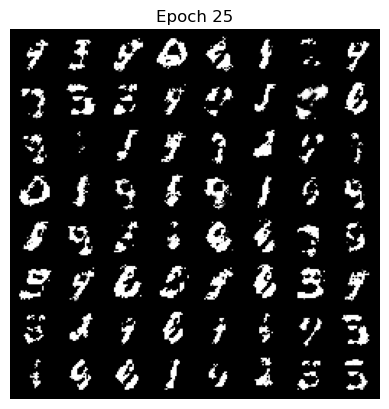

118it [00:16,  7.25it/s]                         


Epoch 26 of 100
Generator loss: -8.23169193, Discriminator loss: -0.29538017


118it [00:16,  7.29it/s]                         


Epoch 27 of 100
Generator loss: -8.33378432, Discriminator loss: -0.28277692


118it [00:16,  7.25it/s]                         


Epoch 28 of 100
Generator loss: -8.48281845, Discriminator loss: -0.27766399


118it [00:16,  7.34it/s]                         


Epoch 29 of 100
Generator loss: -8.29730540, Discriminator loss: -0.27047953


118it [00:16,  7.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 30 of 100
Generator loss: -8.34803083, Discriminator loss: -0.27826063


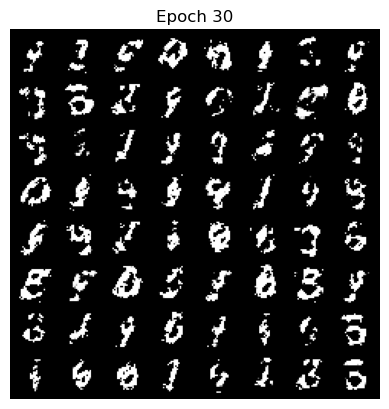

118it [00:16,  7.31it/s]                         


Epoch 31 of 100
Generator loss: -8.38311332, Discriminator loss: -0.26940657


118it [00:16,  7.34it/s]                         


Epoch 32 of 100
Generator loss: -8.48517748, Discriminator loss: -0.26748038


118it [00:16,  7.30it/s]                         


Epoch 33 of 100
Generator loss: -8.29779341, Discriminator loss: -0.26516578


118it [00:16,  7.23it/s]                         


Epoch 34 of 100
Generator loss: -8.51090450, Discriminator loss: -0.26090226


118it [00:16,  7.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 35 of 100
Generator loss: -8.46341890, Discriminator loss: -0.26550624


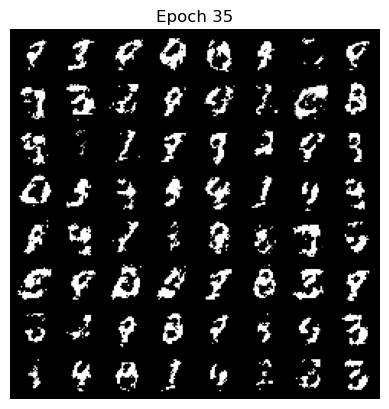

118it [00:16,  7.16it/s]                         


Epoch 36 of 100
Generator loss: -8.55842168, Discriminator loss: -0.25387040


118it [00:16,  7.26it/s]                         


Epoch 37 of 100
Generator loss: -8.83875979, Discriminator loss: -0.25832262


118it [00:16,  7.20it/s]                         


Epoch 38 of 100
Generator loss: -8.62379525, Discriminator loss: -0.24789345


118it [00:16,  7.29it/s]                         


Epoch 39 of 100
Generator loss: -8.18763472, Discriminator loss: -0.25760509


118it [00:16,  7.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 40 of 100
Generator loss: -8.52647595, Discriminator loss: -0.25788326


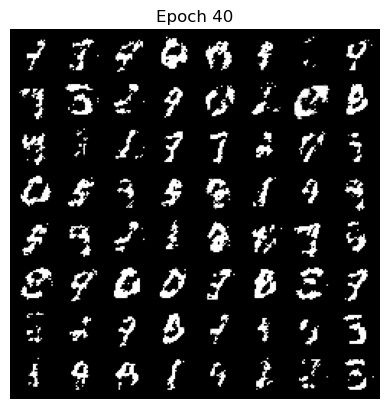

118it [00:16,  7.34it/s]                         


Epoch 41 of 100
Generator loss: -8.62173676, Discriminator loss: -0.23886893


118it [00:15,  7.50it/s]                         


Epoch 42 of 100
Generator loss: -8.37603787, Discriminator loss: -0.24259540


118it [00:15,  7.54it/s]                         


Epoch 43 of 100
Generator loss: -8.44255889, Discriminator loss: -0.23424944


118it [00:15,  7.55it/s]                         


Epoch 44 of 100
Generator loss: -8.57486794, Discriminator loss: -0.24705650


118it [00:15,  7.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 45 of 100
Generator loss: -8.73979198, Discriminator loss: -0.23154494


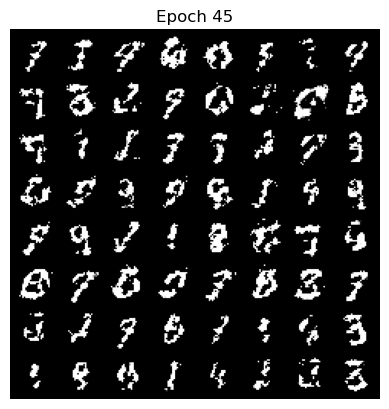

118it [00:15,  7.55it/s]                         


Epoch 46 of 100
Generator loss: -8.50947349, Discriminator loss: -0.22836877


118it [00:15,  7.55it/s]                         


Epoch 47 of 100
Generator loss: -8.42372126, Discriminator loss: -0.22930608


118it [00:15,  7.56it/s]                         


Epoch 48 of 100
Generator loss: -8.61749740, Discriminator loss: -0.23056080


118it [00:16,  7.29it/s]                         


Epoch 49 of 100
Generator loss: -8.65049791, Discriminator loss: -0.22084351


118it [00:16,  7.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 50 of 100
Generator loss: -8.83564741, Discriminator loss: -0.21949377


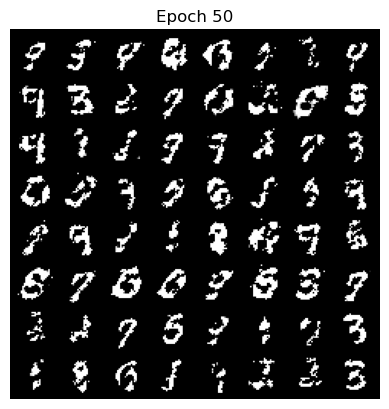

118it [00:16,  7.31it/s]                         


Epoch 51 of 100
Generator loss: -8.59620527, Discriminator loss: -0.20898423


118it [00:15,  7.38it/s]                         


Epoch 52 of 100
Generator loss: -8.60464128, Discriminator loss: -0.22377822


118it [00:16,  7.29it/s]                         


Epoch 53 of 100
Generator loss: -8.89719625, Discriminator loss: -0.22271987


118it [00:17,  6.81it/s]                         


Epoch 54 of 100
Generator loss: -8.91380502, Discriminator loss: -0.21207619


118it [00:16,  7.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 55 of 100
Generator loss: -8.67115767, Discriminator loss: -0.21119931


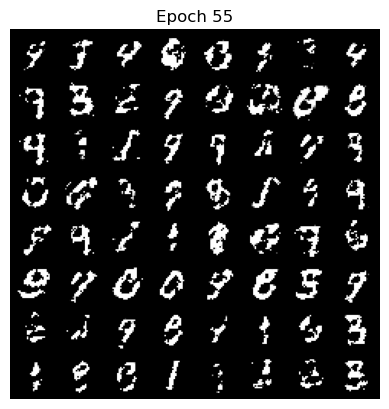

118it [00:16,  7.29it/s]                         


Epoch 56 of 100
Generator loss: -8.63466277, Discriminator loss: -0.21171886


118it [00:16,  7.24it/s]                         


Epoch 57 of 100
Generator loss: -8.74224057, Discriminator loss: -0.21637420


118it [00:16,  7.27it/s]                         


Epoch 58 of 100
Generator loss: -8.65771178, Discriminator loss: -0.20578128


118it [00:16,  7.10it/s]                         


Epoch 59 of 100
Generator loss: -8.70177038, Discriminator loss: -0.20614702


118it [00:15,  7.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 60 of 100
Generator loss: -8.72387619, Discriminator loss: -0.20958117


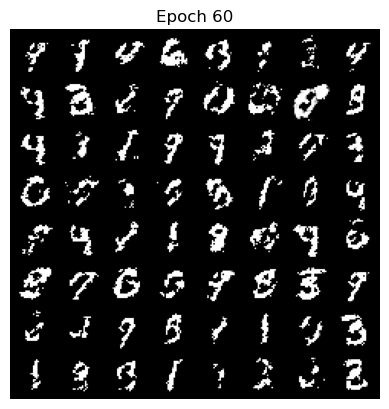

118it [00:16,  7.11it/s]                         


Epoch 61 of 100
Generator loss: -8.72270833, Discriminator loss: -0.20444558


118it [00:16,  7.08it/s]                         


Epoch 62 of 100
Generator loss: -8.96224680, Discriminator loss: -0.19851135


118it [00:16,  7.18it/s]                         


Epoch 63 of 100
Generator loss: -9.13791546, Discriminator loss: -0.20046690


118it [00:16,  6.97it/s]                         


Epoch 64 of 100
Generator loss: -9.17368492, Discriminator loss: -0.19691008


118it [00:16,  6.98it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 65 of 100
Generator loss: -9.01855193, Discriminator loss: -0.19081825


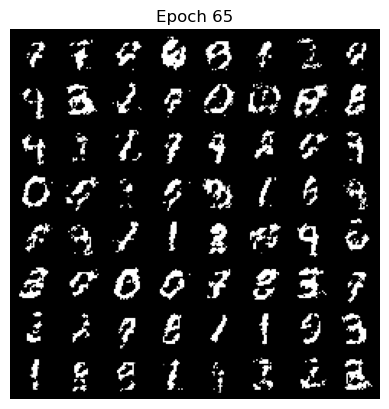

118it [00:16,  7.07it/s]                         


Epoch 66 of 100
Generator loss: -8.81101416, Discriminator loss: -0.19547769


118it [00:16,  6.99it/s]                         


Epoch 67 of 100
Generator loss: -9.14942698, Discriminator loss: -0.19291653


118it [00:16,  7.15it/s]                         


Epoch 68 of 100
Generator loss: -9.18991826, Discriminator loss: -0.19358886


118it [00:16,  7.35it/s]                         


Epoch 69 of 100
Generator loss: -8.91368337, Discriminator loss: -0.18677045


118it [00:16,  7.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 70 of 100
Generator loss: -8.98532029, Discriminator loss: -0.19036944


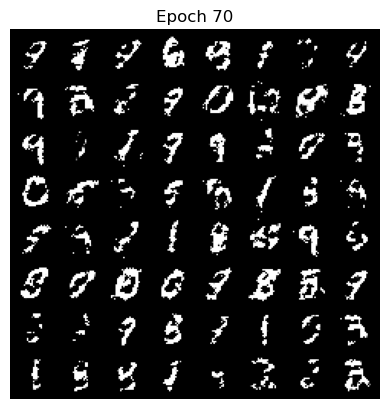

118it [00:17,  6.87it/s]                         


Epoch 71 of 100
Generator loss: -9.10447940, Discriminator loss: -0.18858885


118it [00:16,  7.03it/s]                         


Epoch 72 of 100
Generator loss: -8.82133940, Discriminator loss: -0.18391173


118it [00:16,  7.04it/s]                         


Epoch 73 of 100
Generator loss: -8.68938353, Discriminator loss: -0.18160940


118it [00:16,  7.25it/s]                         


Epoch 74 of 100
Generator loss: -8.78905100, Discriminator loss: -0.17565698


118it [00:16,  7.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 75 of 100
Generator loss: -8.82014461, Discriminator loss: -0.18451101


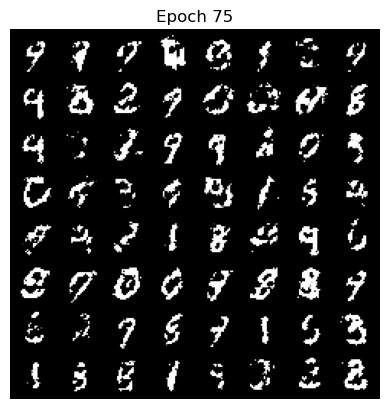

118it [00:16,  7.07it/s]                         


Epoch 76 of 100
Generator loss: -8.90807511, Discriminator loss: -0.16999099


118it [00:16,  7.19it/s]                         


Epoch 77 of 100
Generator loss: -8.71423744, Discriminator loss: -0.17741532


118it [00:16,  6.97it/s]                         


Epoch 78 of 100
Generator loss: -8.69550654, Discriminator loss: -0.17202229


118it [00:16,  7.10it/s]                         


Epoch 79 of 100
Generator loss: -8.86275471, Discriminator loss: -0.16172865


118it [00:16,  7.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 80 of 100
Generator loss: -8.55277150, Discriminator loss: -0.16523413


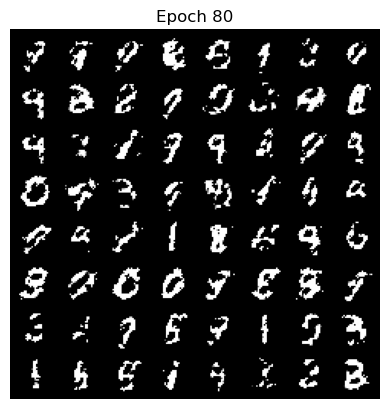

118it [00:17,  6.74it/s]                         


Epoch 81 of 100
Generator loss: -8.50733965, Discriminator loss: -0.16840792


118it [00:17,  6.86it/s]                         


Epoch 82 of 100
Generator loss: -8.58075757, Discriminator loss: -0.16737914


118it [00:16,  6.99it/s]                         


Epoch 83 of 100
Generator loss: -8.56970197, Discriminator loss: -0.16921946


118it [00:16,  6.97it/s]                         


Epoch 84 of 100
Generator loss: -8.68241181, Discriminator loss: -0.16842554


118it [00:16,  7.22it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 85 of 100
Generator loss: -8.69690933, Discriminator loss: -0.16251402


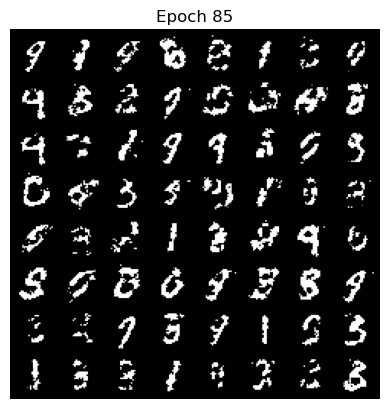

118it [00:16,  7.14it/s]                         


Epoch 86 of 100
Generator loss: -8.75588005, Discriminator loss: -0.16833867


118it [00:16,  7.14it/s]                         


Epoch 87 of 100
Generator loss: -8.90627689, Discriminator loss: -0.15734427


118it [00:16,  7.10it/s]                         


Epoch 88 of 100
Generator loss: -8.72568930, Discriminator loss: -0.15631471


118it [00:17,  6.79it/s]                         


Epoch 89 of 100
Generator loss: -8.61444469, Discriminator loss: -0.16805968


118it [00:16,  7.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 90 of 100
Generator loss: -8.69976833, Discriminator loss: -0.16305166


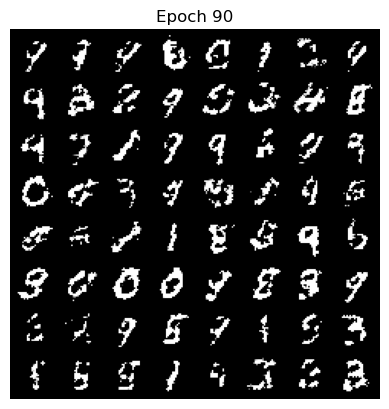

118it [00:16,  7.02it/s]                         


Epoch 91 of 100
Generator loss: -8.73048617, Discriminator loss: -0.16164559


118it [00:16,  7.08it/s]                         


Epoch 92 of 100
Generator loss: -8.57898357, Discriminator loss: -0.16434951


118it [00:16,  7.09it/s]                         


Epoch 93 of 100
Generator loss: -8.51155758, Discriminator loss: -0.16629203


118it [00:16,  7.13it/s]                         


Epoch 94 of 100
Generator loss: -8.63420832, Discriminator loss: -0.16143208


118it [00:16,  7.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 95 of 100
Generator loss: -8.65406470, Discriminator loss: -0.16858734


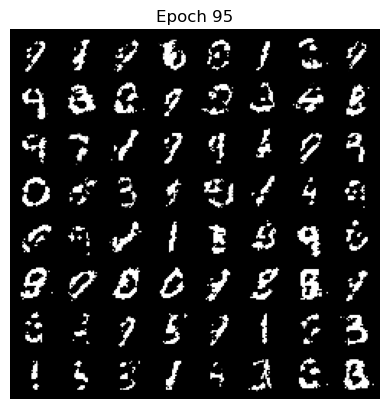

118it [00:16,  7.20it/s]                         


Epoch 96 of 100
Generator loss: -8.52606079, Discriminator loss: -0.15898715


118it [00:16,  7.15it/s]                         


Epoch 97 of 100
Generator loss: -8.37224115, Discriminator loss: -0.16421092


118it [00:16,  7.08it/s]                         


Epoch 98 of 100
Generator loss: -8.45327913, Discriminator loss: -0.15789320


118it [00:16,  7.16it/s]                         


Epoch 99 of 100
Generator loss: -8.44968816, Discriminator loss: -0.16599871


118it [00:17,  6.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 100 of 100
Generator loss: -8.28858708, Discriminator loss: -0.16637289


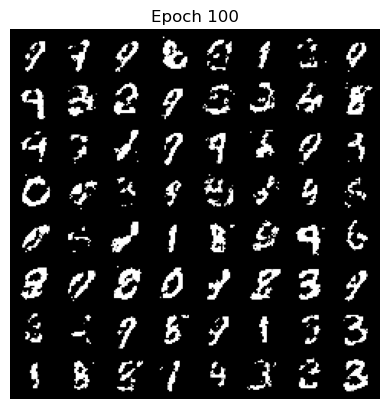

In [39]:
torch.manual_seed(7777)

# Wasserstein loss function for the generator
def generator_loss(output):
    return -output.mean()

# Wasserstein loss function for the discriminator
def discriminator_loss(output_real, output_fake):
    return output_fake.mean() - output_real.mean()

# Fixed noise for tracking generator training
fixed_noise = create_noise(sample_size, nz)

# Training Loop
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = image.size(0)
        noise_data = create_noise(b_size, nz)

        ### Update Discriminator ###
        for _ in range(n_critic):
            optim_d.zero_grad()

            # Discriminator on real data
            real_images = image
            output_real = discriminator(real_images)
            d_loss_real = -output_real.mean()

            # Discriminator on fake data
            fake_images = generator(noise_data).detach()
            output_fake = discriminator(fake_images)
            d_loss_fake = output_fake.mean()

            # Gradient penalty
            # Make sure gradient_penalty function is defined elsewhere in your code
            penalty = gradient_penalty(discriminator, real_images, fake_images, device)
            d_loss = d_loss_real + d_loss_fake + lambda_gp * penalty

            d_loss.backward()
            optim_d.step()

        ### Update Generator ###
        optim_g.zero_grad()
        fake_images = generator(noise_data)
        output_fake = discriminator(fake_images)
        g_loss = -output_fake.mean()
        g_loss.backward()
        optim_g.step()

        loss_g += g_loss.item()
        loss_d += d_loss.item()

    # Update learning rate if you're using a learning rate scheduler
    # Make sure scheduler_g and scheduler_d are defined elsewhere in your code
    scheduler_g.step()
    scheduler_d.step()

    # Generate and save images every 5 epochs
    # ... [image generation and saving code]

    # Log the losses for this epoch
    epoch_loss_g = loss_g / len(train_loader)
    epoch_loss_d = loss_d / (len(train_loader) * n_critic)
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
    
    # Create and visualize generated images every 5 epochs
    if (epoch + 1) % 5 == 0:
        generated_img = generator(noise).cpu().detach()
        generated_img = make_grid(generated_img)
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'Epoch {epoch+1}')
        plt.axis('off')
        plt.show()

        # Save the generated torch tensor models to disk
        save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
        images.append(generated_img)

In [40]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_improved.pth')

DONE TRAINING


In [41]:
import imageio

In [42]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_improved.gif', imgs)

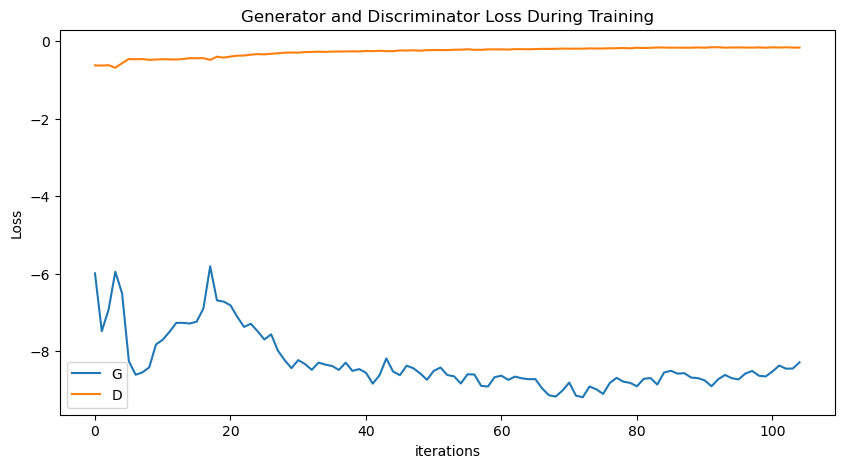

In [44]:
# After training loop ends
# Plot the training losses
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g,label="G")
plt.plot(losses_d,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save models at the end of training
torch.save(generator.state_dict(), 'generator_improved.pth')
torch.save(discriminator.state_dict(), 'discriminator_improved.pth')

### Directed Graphical Model 25 points

In [10]:
# Given probabilities
P_J_given_A_t = 0.9
P_M_given_A_t = 0.7
P_A_given_B_t_E_f = 0.8
P_A_given_B_t_E_t = 0.9
P_A_given_B_f_E_t = 0.3
P_A_given_B_f_E_f = 0.1
P_J_given_A_f = 0.2
P_M_given_A_f = 0.1
P_B_t = 0.1
P_B_f = 0.9
P_E_t = 0.2
P_E_f = 0.8

# Calculate P(J = t, M = t | B = t, E = f)
P_J_M_given_B_t_E_f = (P_J_given_A_t * P_M_given_A_t * P_A_given_B_t_E_f) + \
                      (P_J_given_A_f * P_M_given_A_f * (1 - P_A_given_B_t_E_f))

# Calculate P(J = t, M = t | E = f)
P_J_M_given_E_f = (P_J_M_given_B_t_E_f * P_B_t) + \
                  ((P_J_given_A_t * P_M_given_A_t * P_A_given_B_f_E_f) + \
                   (P_J_given_A_f * P_M_given_A_f * (1 - P_A_given_B_f_E_f))) * P_B_f

# Calculate P(B = t | E = f, J = t, M = t)
P_B_t_given_E_f_J_t_M_t = (P_J_M_given_B_t_E_f * P_B_t) / P_J_M_given_E_f

# Calculate P(J = t, M = t | B = t, E = t)
P_J_M_given_B_t_E_t = (P_J_given_A_t * P_M_given_A_t * P_A_given_B_t_E_t) + \
                      (P_J_given_A_f * P_M_given_A_f * (1 - P_A_given_B_t_E_t))

# Calculate P(J = t, M = t | E = t)
P_J_M_given_E_t = (P_J_M_given_B_t_E_t * P_B_t) + \
                  ((P_J_given_A_t * P_M_given_A_t * P_A_given_B_f_E_t) + \
                   (P_J_given_A_f * P_M_given_A_f * (1 - P_A_given_B_f_E_t))) * P_B_f

# Calculate P(B = t | E = t, J = t, M = t)
P_B_t_given_E_t_J_t_M_t = (P_J_M_given_B_t_E_t * P_B_t) / P_J_M_given_E_t

# Print the results
print(f"P(B = t | E = f, J = t, M = t): {P_B_t_given_E_f_J_t_M_t}")
print(f"P(B = t | E = t, J = t, M = t): {P_B_t_given_E_t_J_t_M_t}")


P(B = t | E = f, J = t, M = t): 0.4106709781729992
P(B = t | E = t, J = t, M = t): 0.23747913188647746


### Chow-Liu Algorithm 25 pts

In [7]:
import numpy as np

# Data from the table
data = np.array([
    [1, 1, 1, 36],
    [1, 1, 0, 4],
    [1, 0, 1, 2],
    [1, 0, 0, 8],
    [0, 1, 1, 9],
    [0, 1, 0, 1],
    [0, 0, 1, 8],
    [0, 0, 0, 32]
])

# Total count
total_count = data[:, 3].sum()

# Probability distributions
p_x = np.sum(data[:, 3] * data[:, 0]) / total_count
p_y = np.sum(data[:, 3] * data[:, 1]) / total_count
p_z = np.sum(data[:, 3] * data[:, 2]) / total_count

# Joint probability distributions
p_xy = np.zeros((2, 2))  # P(X, Y)
p_xz = np.zeros((2, 2))  # P(X, Z)
p_yz = np.zeros((2, 2))  # P(Y, Z)

for row in data:
    x, y, z, count = row
    p_xy[int(x), int(y)] += count / total_count
    p_xz[int(x), int(z)] += count / total_count
    p_yz[int(y), int(z)] += count / total_count

# Mutual Information I(X, Y)
mi_xy = 0
for x in [0, 1]:
    for y in [0, 1]:
        if p_xy[x, y] > 0:
            mi_xy += p_xy[x, y] * np.log2(p_xy[x, y] / (p_x if x == 1 else 1 - p_x) / (p_y if y == 1 else 1 - p_y))

mi_xy

0.2780719051126376

In [8]:
# Mutual Information I(X, Z)
mi_xz = 0
for x in [0, 1]:
    for z in [0, 1]:
        if p_xz[x, z] > 0:
            mi_xz += p_xz[x, z] * np.log2(p_xz[x, z] / (p_x if x == 1 else 1 - p_x) / (p_z if z == 1 else 1 - p_z))

mi_xz

0.13284496180903207

In [9]:
# Mutual Information I(Y, Z)
mi_yz = 0
for y in [0, 1]:
    for z in [0, 1]:
        if p_yz[y, z] > 0:
            mi_yz += p_yz[y, z] * np.log2(p_yz[y, z] / (p_y if y == 1 else 1 - p_y) / (p_z if z == 1 else 1 - p_z))
            
mi_yz

0.3973126097494865